## Projet de TP de THJ 
Using game theory approaches for clustering.

The idea is like this: 
- At first we will generate random blobs data points, let it be  4 blobs.
this first random initialization is made for testing purposes, to see at the end if we will get 4 clusters that are really associated to these blobs

### About the Algorithm

- Initialize the blobs
- initialize random cluster centoids

- player 1 is an `ordinary point`, it's strategies are : 
    * s1 : choose cluster 1 
    * s2 : choose cluster 2 
    * s3 : choose cluster 3 
    * s4 : choose cluster 4 

- player 2 is the `cluster`, it's stategies are just some different approaches on how it will adjust it's position   
    * Centroid Strategy
    * Farthest Point Strategy
    * K-Means++ Initialization

In [84]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [85]:
# generate sample data 
# Generating sample data
X, _ = make_blobs(n_samples=100, centers=4, cluster_std=0.4, random_state=0)



Les premieres lignes de notre dataframe:
           x         y  centroid
0  0.771948  3.831534         0
1 -1.765399  7.942280         0
2  1.280685  4.352457         0
3  1.038249  4.455052         0
4  1.468386  4.784739         0
5  0.821339  4.182866         0
6 -1.871394  3.681908         0
7 -0.868487  7.870481         0
8  0.293762  5.084097         0
9 -1.395929  7.739708         0


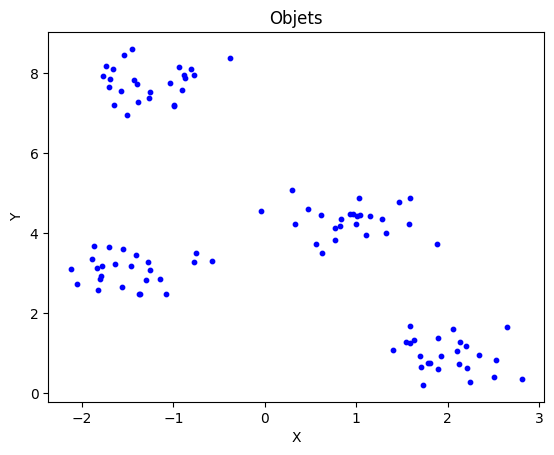

In [86]:
# Display of the data 
# Créer un DataFrame à partir de X
data = pd.DataFrame(X, columns=['x', 'y'])
data['centroid'] = 0

print('Les premieres lignes de notre dataframe:\n', data.head(10))

# print('after adding the centroid column\n', data.head(10))
# print(data.iloc[0])
# data.at[0, 'centroid'] = 1
# print(data.iloc[0])

# Afficher les données avec Matplotlib
plt.scatter(X[:, 0], X[:, 1], c='blue', s=10)
plt.title('Objets')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Initializing the pay_off matrix 

In [87]:
payoff_matrix = np.array(
     # Cluster
    [[(0, 0), (0, 0), (0, 0), (0, 0)],
     [(0, 0), (0, 0), (0, 0), (0, 0)],  # Point 
     [(0, 0), (0, 0), (0, 0), (0, 0)]]
)

print(payoff_matrix)

[[[0 0]
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  [0 0]]]


## defining the strategies of the points 

c:\Users\monms\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


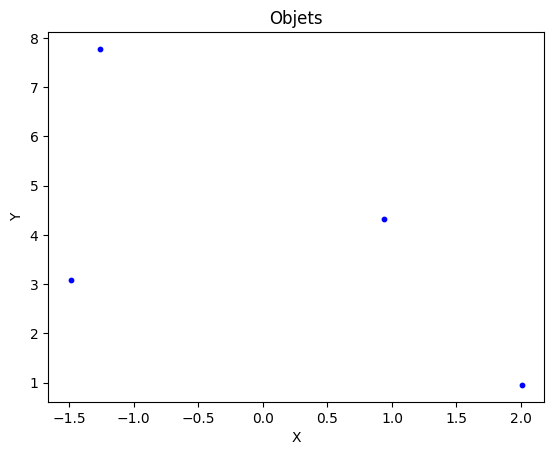

array([[ 0.93588159,  4.3205638 ],
       [-1.26414502,  7.77811813],
       [-1.48886624,  3.07731162],
       [ 2.00454873,  0.9520213 ]])

In [88]:
def centroid_strategy(X, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    centroid_positions = kmeans.cluster_centers_
    return centroid_positions

centroid_positions = centroid_strategy(X, 4)
plt.scatter(centroid_positions[:, 0], centroid_positions[:, 1], c='blue', s=10)
plt.title('Objets')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

centroid_positions

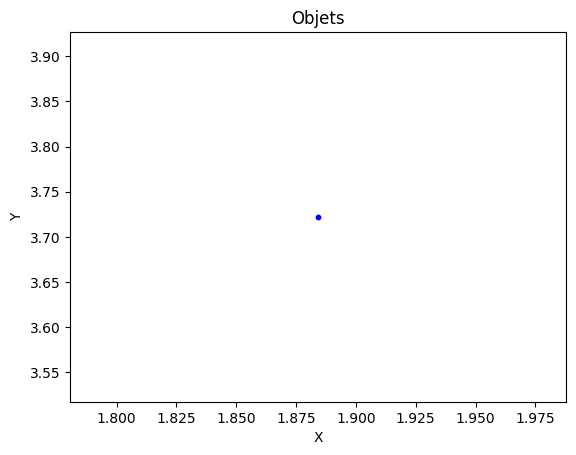

array([1.88417193, 3.72204106])

In [89]:
# Strategy 2: Farthest Point Strategy
def find_farthest_point(points, centers):
    farthest_dist = -1
    farthest_point = None
    for point in points:
        min_distance = min(np.linalg.norm(point - c) for c in centers)
        if min_distance > farthest_dist:
            farthest_dist = min_distance
            farthest_point = point
    return farthest_point

farthest_point = find_farthest_point(X, centroid_positions)

plt.scatter(farthest_point[0], farthest_point[ 1], c='blue', s=10)
plt.title('Objets')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

farthest_point


c:\Users\monms\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


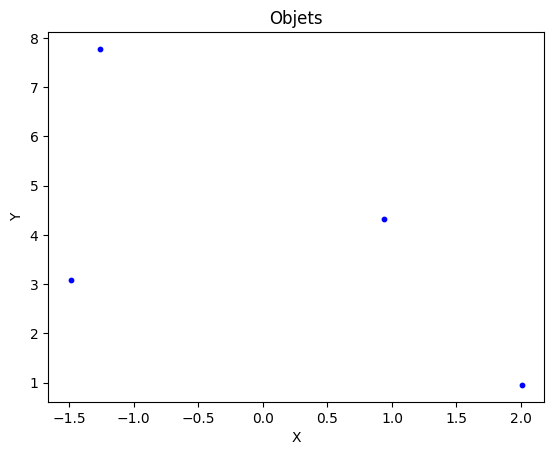

array([[-1.26414502,  7.77811813],
       [ 0.93588159,  4.3205638 ],
       [ 2.00454873,  0.9520213 ],
       [-1.48886624,  3.07731162]])

In [90]:

# Strategy 3: K-Means++ Initialization
def kmeans_pp_strategy(X, num_clusters):
    kmeans_pp = KMeans(n_clusters=num_clusters, init='k-means++')
    kmeans_pp.fit(X)
    kmeans_pp_positions = kmeans_pp.cluster_centers_
    return kmeans_pp_positions

kmeans_pp_positions = kmeans_pp_strategy(X, 4)
plt.scatter(kmeans_pp_positions[:,0], kmeans_pp_positions[:, 1], c='blue', s=10)
plt.title('Objets')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

kmeans_pp_positions
